# Data Analysis Tools in Python
<hr>
Python has a number of packages that speed up and support data analysis.

In [77]:
# import necessary packages
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

## <a href="https://pandas.pydata.org/pandas-docs/stable/index.html">Pandas</a>
One of my favorite things about Pandas is how easy it is to read in data.  Pandas has
<a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html">methods to read in a ton of file types</a>
including .csv, .xlsx, binary, HTML, even the clipboard!

I grabbed a .csv file from Kaggle to demonstrate how straightforward Python with Pandas can be in handling large datasets.

You can access the original dataset and information here:
<a href="https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities">Daily Temperature of Major Cities</a>

In [78]:
# Lets assume we are going into this without any knowledge of the dataset, it is really big and we don't want to open it
# in Excel.  We can get all the information we need easily using Pandas,
df = pd.read_csv('datasets/city_temperature.csv')

c:\users\charlotte.morrison\pycharmprojects\python-demo\venv\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [79]:
# First, I want to find out the columns.
column_names = df.columns   # I can save these in a variable for later use, or just get the column names again.
print(column_names)

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')


In [80]:
# Now I would like to see what the data looks like, I can use the head or tail methods to see a part of the dataframe.
print(df.head(10))

   Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9
5  Africa  Algeria   NaN  Algiers      1    6  1995            48.7
6  Africa  Algeria   NaN  Algiers      1    7  1995            48.9
7  Africa  Algeria   NaN  Algiers      1    8  1995            49.1
8  Africa  Algeria   NaN  Algiers      1    9  1995            49.0
9  Africa  Algeria   NaN  Algiers      1   10  1995            51.9


In [81]:
df.tail(15)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2906312,North America,US,Additional Territories,San Juan Puerto Rico,7,17,2013,83.4
2906313,North America,US,Additional Territories,San Juan Puerto Rico,7,18,2013,78.6
2906314,North America,US,Additional Territories,San Juan Puerto Rico,7,19,2013,81.6
2906315,North America,US,Additional Territories,San Juan Puerto Rico,7,20,2013,83.4
2906316,North America,US,Additional Territories,San Juan Puerto Rico,7,21,2013,82.8
2906317,North America,US,Additional Territories,San Juan Puerto Rico,7,22,2013,80.9
2906318,North America,US,Additional Territories,San Juan Puerto Rico,7,23,2013,83.1
2906319,North America,US,Additional Territories,San Juan Puerto Rico,7,24,2013,83.2
2906320,North America,US,Additional Territories,San Juan Puerto Rico,7,25,2013,83.7
2906321,North America,US,Additional Territories,San Juan Puerto Rico,7,26,2013,82.4


In [82]:
# If I need to know the datatypes I can view what is stored in each column.  If there is mixed data types in a column
# it may assign the object data type- you might need to clean the column and update the datatype.
print(df.dtypes)

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object


In [83]:
# Each column in a dataframe is also a series, you can get summary statistics for a column by using .describe() or
# calling a statistical method by itself.
print(df['AvgTemperature'].describe())
print(df['AvgTemperature'].describe().shape)

print('\n\n')

print('Count: {}'.format(df['AvgTemperature'].count()))   # I like to use {} in the text, and .format because it will
# generally just handle the type conversion, formatting can be applied too.
print('Max Temp: {}'.format(df['AvgTemperature'].max()))
print('Min Temp: {}'.format(df['AvgTemperature'].min()))


count    2.906327e+06
mean     5.600492e+01
std      3.212359e+01
min     -9.900000e+01
25%      4.580000e+01
50%      6.250000e+01
75%      7.550000e+01
max      1.100000e+02
Name: AvgTemperature, dtype: float64
(8,)



Count: 2906327
Max Temp: 110.0
Min Temp: -99.0


Subsets of data from a dataframe can be extracted, manipulated and assigned to new DataFrames.

<i>Reminder- if you use only one column, it is a Series, you may encounter an error in some libraries if you are using a
Series instead of a DataFrame.</i>

In [84]:
# I can extract a series, <temperature> and perform an action on this new series. I can add this series back to the
# original DataFrame or just use it as is.
temps = df['AvgTemperature']
print(type(temps), temps.shape)
print(temps.head())

<class 'pandas.core.series.Series'> (2906327,)
0    64.2
1    49.4
2    48.8
3    46.4
4    47.9
Name: AvgTemperature, dtype: float64


In [85]:
# I can also grab a subset of the DataFrame if I only want some of the columns
year_temps = df[['Year', 'AvgTemperature']]
print(type(year_temps), year_temps.shape)
print(year_temps.head())

<class 'pandas.core.frame.DataFrame'> (2906327, 2)
   Year  AvgTemperature
0  1995            64.2
1  1995            49.4
2  1995            48.8
3  1995            46.4
4  1995            47.9


In [86]:
# (you cannot use keyword boolean operations <and, or, not>, you must use the symbols &, | !

us_temps = df[df['Country'] == 'US']
print(type(us_temps), us_temps.shape)
print(us_temps.head())

<class 'pandas.core.frame.DataFrame'> (1455337, 8)
                Region Country    State        City  Month  Day  Year  \
1450990  North America      US  Alabama  Birmingham      1    1  1995   
1450991  North America      US  Alabama  Birmingham      1    2  1995   
1450992  North America      US  Alabama  Birmingham      1    3  1995   
1450993  North America      US  Alabama  Birmingham      1    4  1995   
1450994  North America      US  Alabama  Birmingham      1    5  1995   

         AvgTemperature  
1450990            50.7  
1450991            37.2  
1450992            33.2  
1450993            33.3  
1450994            26.4  


In [87]:
fl_temps = df[df['City'] == 'Jacksonville'].copy()
print(type(fl_temps), fl_temps.shape)
print(fl_temps.head())

# specific rows can be sliced using .iloc like list slicing.

<class 'pandas.core.frame.DataFrame'> (9265, 8)
                Region Country    State          City  Month  Day  Year  \
1711336  North America      US  Florida  Jacksonville      1    1  1995   
1711337  North America      US  Florida  Jacksonville      1    2  1995   
1711338  North America      US  Florida  Jacksonville      1    3  1995   
1711339  North America      US  Florida  Jacksonville      1    4  1995   
1711340  North America      US  Florida  Jacksonville      1    5  1995   

         AvgTemperature  
1711336            57.2  
1711337            58.7  
1711338            45.6  
1711339            46.1  
1711340            42.5  


In [88]:
# I would like to graph using the dates, but they are in 3 columns, so I can use some functions to convert it.
# First I want to create a column that combines the date values.
cols=["Year","Month","Day"]
fl_temps['datetime'] = fl_temps[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

# convert the values to a datetime object so they will be treated as dates.
fl_temps['datetime'] = pd.to_datetime(fl_temps['datetime'])


It is easy to create a quick plot using pandas.  But I suggest using matplotlib because it is much more robust.


<AxesSubplot:>

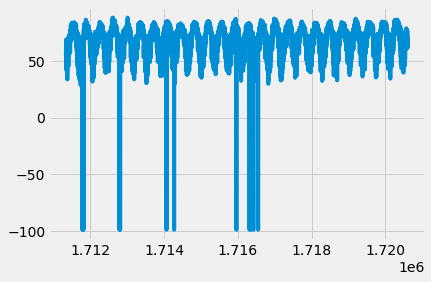

In [89]:
fl_temps['AvgTemperature'].plot()

                Region Country    State          City  Month  Day  Year  \
1711336  North America      US  Florida  Jacksonville      1    1  1995   
1711337  North America      US  Florida  Jacksonville      1    2  1995   
1711338  North America      US  Florida  Jacksonville      1    3  1995   
1711339  North America      US  Florida  Jacksonville      1    4  1995   
1711340  North America      US  Florida  Jacksonville      1    5  1995   

         AvgTemperature   datetime  
1711336            57.2 1995-01-01  
1711337            58.7 1995-01-02  
1711338            45.6 1995-01-03  
1711339            46.1 1995-01-04  
1711340            42.5 1995-01-05  


<AxesSubplot:>

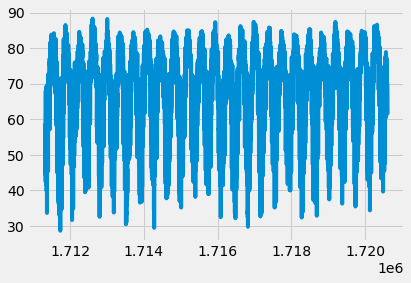

In [90]:
# The data above shows that there are some very low values, according to the dataset creater, -99 was entered any time there
# was missing data.  I want to filter that out.

fl_temps = fl_temps[fl_temps['AvgTemperature'] > -99]
print(fl_temps.head())
fl_temps['AvgTemperature'].plot()

In [91]:
#  The temperatures are in F and I would like them in C, I can easily apply a formula to the whole Series with writing a loop
fl_temps['AvgTemperatureC'] = round((fl_temps['AvgTemperature'] - 32) * 5 /9, 2)
fl_temps.head()     # in Jupyter notebook, it will format this nicely if it is the last output.

,Region,Country,State,City,Month,Day,Year,AvgTemperature,datetime,AvgTemperatureC
1711336,North America,US,Florida,Jacksonville,1,1,1995,57.2,1995-01-01,14.00
1711337,North America,US,Florida,Jacksonville,1,2,1995,58.7,1995-01-02,14.83
1711338,North America,US,Florida,Jacksonville,1,3,1995,45.6,1995-01-03,7.56
1711339,North America,US,Florida,Jacksonville,1,4,1995,46.1,1995-01-04,7.83
1711340,North America,US,Florida,Jacksonville,1,5,1995,42.5,1995-01-05,5.83


## <a href="https://matplotlib.org/">Matplotlib</a>
Now that I have my data cleaned I may want to design a visualization that is a bit better looking than the Pandas default.

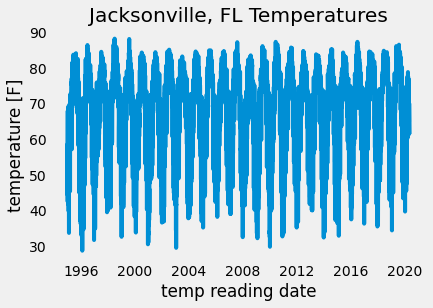

In [92]:
# I can represent this data using a simple plot
fig, ax = plt.subplots()        # I won't be getting into multiple plots here...\
ax.plot(fl_temps['datetime'],fl_temps['AvgTemperature'])
ax.set(xlabel='temp reading date', ylabel='temperature [F]', title="Jacksonville, FL Temperatures")
ax.grid()


[Text(0.5, 0, 'temp reading date'),
 Text(0, 0.5, 'temperature [F]'),
 Text(0.5, 1.0, 'Jacksonville, FL Temperatures')]

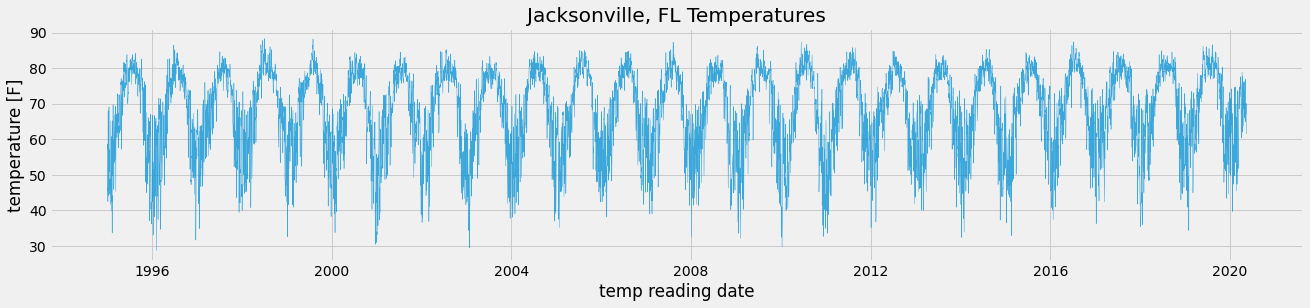

In [93]:
# I can customize this plot and make it look better
plt.style.use('fivethirtyeight')              # I added some formating, there are a lot of options, and you can customize too
fig, ax = plt.subplots(figsize=(20, 4))        # It is a big squished, I want to change the shape
ax.plot(fl_temps['datetime'],fl_temps['AvgTemperature'], linewidth=0.5, alpha=0.75)
ax.set(xlabel='temp reading date', ylabel='temperature [F]', title="Jacksonville, FL Temperatures")

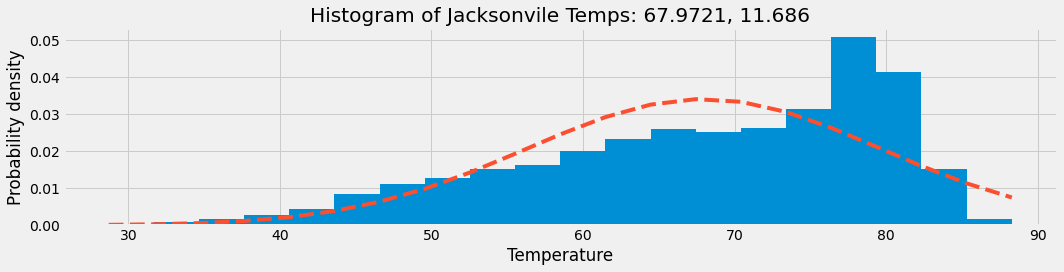

In [94]:
# I might also like to have a histogram of the values
num_bins = 20
mu = fl_temps['AvgTemperature'].mean()
sigma = fl_temps['AvgTemperature'].std()

fig, ax = plt.subplots(figsize=(15, 4))

# the histogram of the data
n, bins, patches = ax.hist(fl_temps['AvgTemperature'], num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Temperature')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Jacksonvile Temps: {}, {}'.format(round(mu, 4), round(sigma, 4)))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## Other Tools
Other tools that are very useful in analyzing data are listed below.  Unless you are working with 3 or more dimensional
data.

### <a href="https://numpy.org/">Numpy</a>

* Can handle multi-dimensional arrays
* Supports vectorization, broadcasting

Has numerical computing tools, mathematical functions, linear algebra routines, fourier transforms, etc.

If you are working with Pandas, it is a wrapper for Numpy, and you can access the underlying Numpy arrays and functions.


### <a href="https://scikit-learn.org/stable/">Scikit-Learn</a>
Scikit-learn provides tools for machine learning.  If you need to normalize, standardize or pre-process data, there are
stable implementations that allow you to clean data in just a couple of lines of code.

### Some additional tools I like!
* <a href="https://keras.io/">Keras</a>  a deep learning framework that is comparatively easy to use.
* <a href="https://www.tensorflow.org/">Tensorflow</a> tools, libraries and resources for developing ML applications
* <a href="https://pytorch.org/">PyTorch</a> machine learning framework for AI development.




